<a href="https://colab.research.google.com/github/aayushdebugging/GenerativeAI/blob/main/Invoice_AllType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install PyPDF2
!pip install langchain
!pip install Pillow
!pip install pytesseract
!pip install langchain-huggingface
!pip install huggingface_hub
!pip install transformers
!pip install accelerate
!pip install bitsandbytes
!pip install langchain-community


  Using cached langchain_huggingface-0.0.3-py3-none-any.whl.metadata (1.2 kB)
  Using cached sentence_transformers-3.0.1-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.

In [2]:

!sudo apt install -y tesseract-ocr
!pip install pytesseract datasets seqeval tensorboard evaluate --upgrade

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
from google.colab import userdata
sec_key=userdata.get("HF_TOKEN")


In [4]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"]=sec_key

In [6]:
from langchain_huggingface import HuggingFaceEndpoint
from langchain import PromptTemplate, LLMChain

In [7]:
repo_id="mistralai/Mistral-7B-Instruct-v0.3"
llm=HuggingFaceEndpoint(repo_id=repo_id,max_length=128,temperature=0.7,token = sec_key)

                    max_length was transferred to model_kwargs.
                    Please make sure that max_length is what you intended.
                    token was transferred to model_kwargs.
                    Please make sure that token is what you intended.


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Please upload a PDF or image of the invoice.


Saving Sample Invoice image.png to Sample Invoice image (4).png


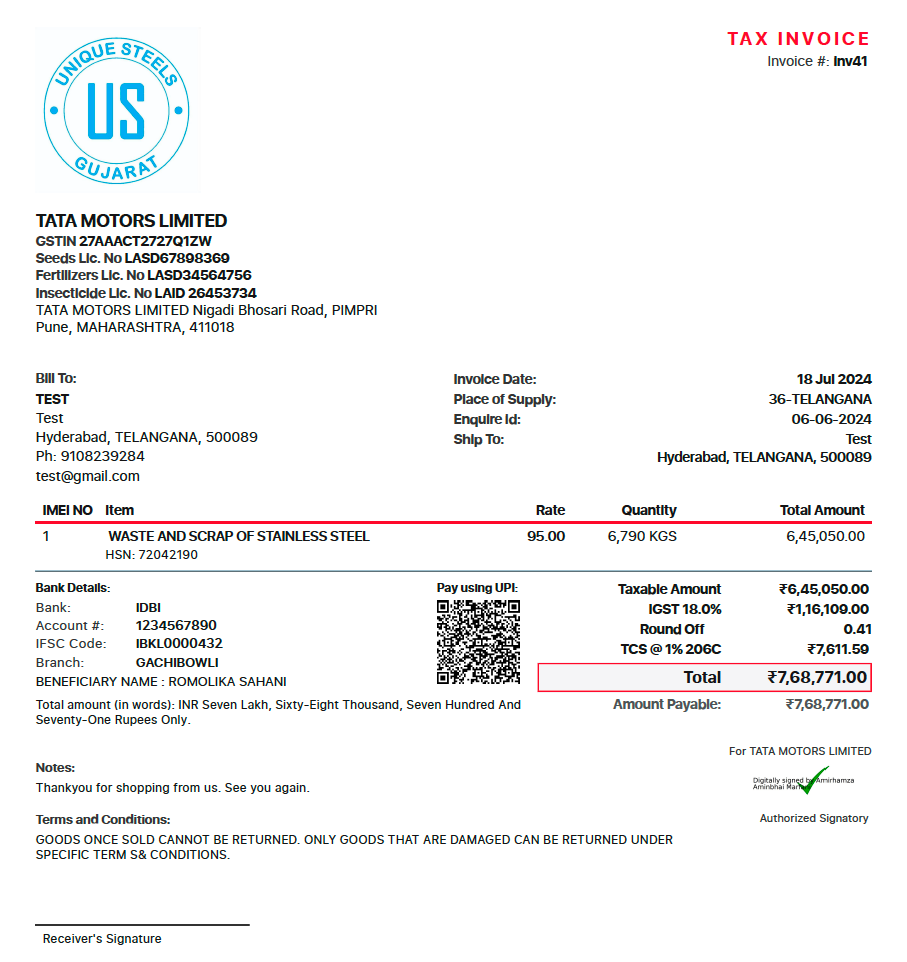

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Details: 
 1. Customer Name: "Romolika Sahani"
    2. Customer Address: "Hyderabad, TELANGANA, 500089, test@gmail.com"
    3. Invoice Date: "18 Jul 2024"
    4. List of Products:
        [
            {
                "Product Name": "Waste and Scrap of Stainless Steel",
                "Quantity": "6,790 KGS",
                "Unit Price": "95.00"
            }
        ]
    5. Total Amount: 768,771.00
    6. Tax Amount:
        {
            "IGST": 116,109.00,
            "TCS": 27,611.50
        }
    7. Further Details:
        {
            "Bank": "DBI",
            "Beneficiary Name": "Romolika Sahani",
            "Account Number": "1234567890",
            "IFSC Code": "IBKLO000432",
            "Branch": "GACHIBOWLI"
        }


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


In [8]:
from PyPDF2 import PdfReader
import os
from langchain import PromptTemplate, LLMChain
from PIL import Image
import pytesseract
import io
import re
from google.colab import files
from IPython.display import display, Image as IPImage
from langchain.llms import HuggingFaceEndpoint

# Function to extract text from an image
def extract_text_from_image(image):
    image = Image.open(io.BytesIO(image))
    display(image)  # Display the image in the notebook
    extracted_text = pytesseract.image_to_string(image)
    return extracted_text

# Function to extract text from a PDF
def get_pdf_text(pdf_docs):
    pdf = io.BytesIO(pdf_docs)
    text = ""
    pdf_reader = PdfReader(pdf)
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text

# Function to set up the conversational chain using Hugging Face
def get_conversational_chain():
    prompt_template = """
    Invoice Text: {text}

    Extract the following details:
    1. Customer Name
    2. Customer Address
    3. Invoice Date
    4. List of Products (Product Name, Quantity, Unit Price)
    5. Total Amount
    6. Tax Amount
    .
    .
    .
    Any further Details (which are important and available)

    Answer: Let's think step by step and return me the answer in the form of json. if you don't find any text related to invoice then directly say no invoice found.
    """

    prompt = PromptTemplate(template=prompt_template, input_variables=["text"])
    chain = LLMChain(llm=llm, prompt=prompt)
    return chain

# Function to extract details from text
def get_details(text):
    chain = get_conversational_chain()
    response = chain({"text": text}, return_only_outputs=True)
    res = chain.run(text)
    print("Details: \n", res)

# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Main function
def main():
    print("Please upload a PDF or image of the invoice.")
    uploaded = files.upload()

    if uploaded:
        for file_name in uploaded.keys():
            file_bytes = uploaded[file_name]
            file_type = file_name.split('.')[-1]

            if file_type == 'pdf':
                raw_text = get_pdf_text(file_bytes)
            elif file_type in ['jpg', 'jpeg', 'png']:
                raw_text = extract_text_from_image(file_bytes)
            else:
                print("Invalid file type.")
                return

            preprocessed_text = preprocess_text(raw_text)
            get_details(preprocessed_text)
    else:
        print("No file uploaded.")

# Run the main function
main()